In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
Us = list(range(30))
sigma_u = 1
vp = 4
sigma_p = 1
v = np.arange(0.01, 5, 0.01)

dt = 0.01

PHIs = []

In [ ]:
for u in Us:
    phi = list(range(500))
    phi[0] = vp
    ep = list(range(500))
    ep[0] = 0
    eu = list(range(500))
    eu[0] = (u - phi[0]**2) / sigma_u
    
    for j in range(1, 500):
            phi[j] = phi[j-1] + dt * (-ep[j-1] + eu[j-1] * (2 * phi[j-1]))
            ep[j] = ep[j-1] + dt * (phi[j-1] - vp - sigma_p * ep[j-1])
            eu[j] = eu[j-1] + dt * (u - phi[j-1] ** 2 - sigma_u * eu[j-1])
            
    PHIs.append(phi[-1])

fig = plt.figure()
plt.scatter(Us, PHIs)
plt.xlabel("u")
plt.ylabel("φ")
plt.plot()
plt.grid()
# fig.savefig("before.jpg")
plt.show()

In [4]:
Us = list(range(30))
sigma_u = 1
vp = 1
sigma_p = 1
v = np.arange(0.01, 5, 0.01)

dt = 0.01

PHIs = []

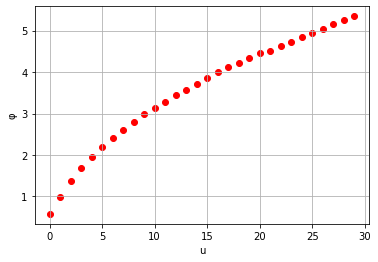

In [5]:
for u in Us:    
    phi = list(range(500))
    phi[0] = vp
    ep = list(range(500))
    ep[0] = 0
    eu = list(range(500))
    eu[0] = (u - phi[0]**2) / sigma_u
    
    for i in range(1, 10):
            # 推測
            for j in range(1, 500):
                phi[j] = phi[j-1] + dt * (-ep[j-1] + eu[j-1] * (2 * phi[j-1]))
                ep[j] = ep[j-1] + dt * (phi[j-1] - vp - sigma_p * ep[j-1])
                eu[j] = eu[j-1] + dt * (u - phi[j-1] ** 2 - sigma_u * eu[j-1])

            phi[0] = phi[-1]
            ep[0] = ep[-1]
            eu[0] = eu[-1]

            # 学習
            vp = vp + ep[-1] * dt
            sigma_p = max(sigma_p + 1/2 * (ep[-1]**2 - 1/sigma_p), 1)
            sigma_u = max(sigma_u + 1/2 * (eu[-1]**2 - 1/sigma_u), 1) 
        
    PHIs.append(phi[-1])
    
fig = plt.figure()
plt.scatter(Us, PHIs, color="r")
plt.xlabel("u")
plt.ylabel("φ")
plt.plot()
plt.grid()
# fig.savefig("after2.jpg")
plt.show()
